In [21]:
import scanpy as sc
import pandas as pd

In [22]:
import scanpy as sc
import anndata

# List of paths to the directories containing 10x Genomics formatted data
directory_paths = [
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/434',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/435',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/436',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/437',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/438',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/439',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/440',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/441',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/442',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/443',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/444',
]

# Initialize a list to store the AnnData objects
adata_list = []

# Loop through each directory path and read the data
for path in directory_paths:
    adata = sc.read_10x_mtx(path)
    adata_list.append(adata)

# Concatenate the list of AnnData objects
concatenated_adata = anndata.concat(adata_list, index_unique=None, batch_key='sample')


KeyboardInterrupt: 

In [ ]:
import scanpy as sc
import anndata
import numpy as np

# List of paths to the directories containing 10x Genomics formatted data
directory_paths = [
     '/Users/randyramdial/Desktop/FoMR/Caron 2020/434',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/435',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/436',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/437',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/438',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/439',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/440',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/441',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/442',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/443',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/444',
]

# Initialize a list to store the AnnData objects
adata_list = []

# Loop through each directory path and read the data
for path in directory_paths:
    adata = sc.read_10x_mtx(path)
    
    # Add a new categorical annotation 'batch' to each AnnData object
    batch_key = path.split('/')[-1]  # Extract batch information from the path
    adata.obs['batch'] = np.repeat(batch_key, adata.shape[0])
    
    adata_list.append(adata)

# Concatenate the list of AnnData objects
concatenated_adata = anndata.concat(adata_list, index_unique=None)

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
concatenated_adata

AnnData object with n_obs × n_vars = 39375 × 33694
    obs: 'batch'

In [ ]:
import scanpy as sc
import anndata
import numpy as np

# List of paths to the directories containing 10x Genomics formatted data
directory_paths = [
     '/Users/randyramdial/Desktop/FoMR/Caron 2020/434',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/435',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/436',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/437',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/438',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/439',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/440',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/441',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/442',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/443',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/444',
]

# Initialize a list to store the AnnData objects
adata_list = []

# Loop through each directory path and read the data
for path in directory_paths:
    adata = sc.read_10x_mtx(path)
    
    # Add a new categorical annotation 'batch' to each AnnData object
    batch_key = path.split('/')[-1]  # Extract batch information from the path
    adata.obs['batch'] = np.repeat(batch_key, adata.shape[0])
    
    adata_list.append(adata)

# Concatenate the list of AnnData objects
concatenated_adata = anndata.concat(adata_list, index_unique=None)

# Add var attributes 'gene_ids' and 'feature_types' from the first adata in the list
concatenated_adata.var['gene_ids'] = adata_list[0].var['gene_ids']
concatenated_adata.var['feature_types'] = adata_list[0].var['feature_types']

concatenated_adata


/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 39375 × 33694
    obs: 'batch'
    var: 'gene_ids', 'feature_types'

In [ ]:
concatenated_adata

AnnData object with n_obs × n_vars = 39375 × 33694
    obs: 'batch'
    var: 'gene_ids', 'feature_types'

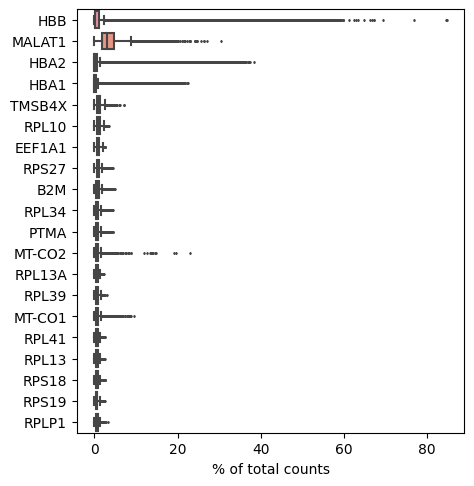

In [ ]:
sc.pl.highest_expr_genes(concatenated_adata, n_top=20, )


In [ ]:
sc.pp.filter_cells(concatenated_adata, min_genes=200)
sc.pp.filter_genes(concatenated_adata, min_cells=3)

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
concatenated_adata.var['mt'] = concatenated_adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(concatenated_adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
adata = concatenated_adata
adata

AnnData object with n_obs × n_vars = 39355 × 23198
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


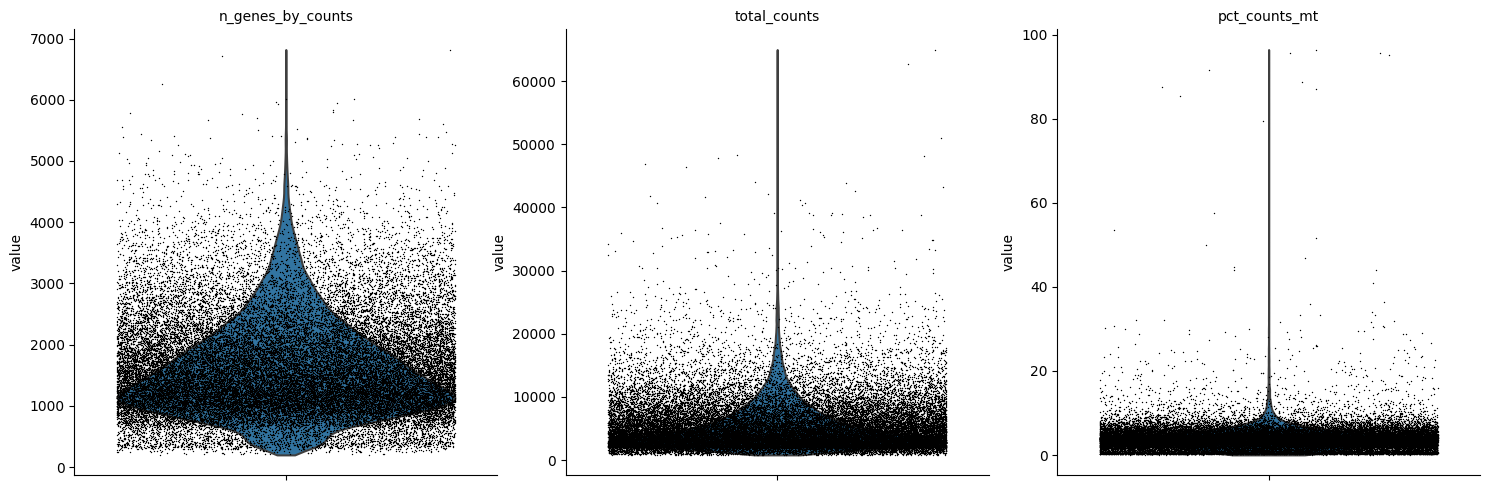

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

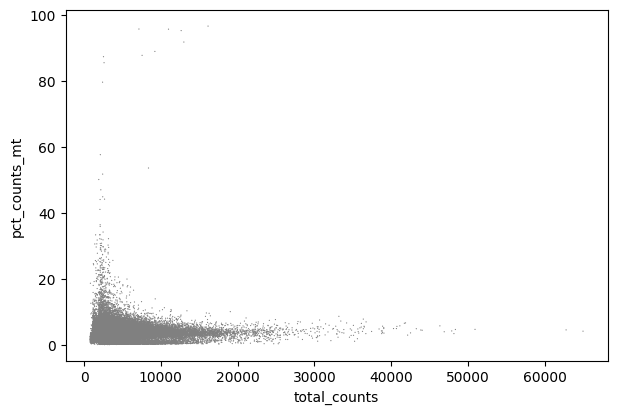

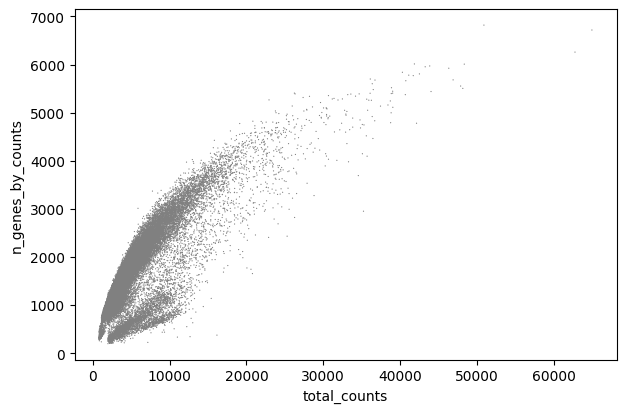

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [ ]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
sc.pp.log1p(adata)


In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

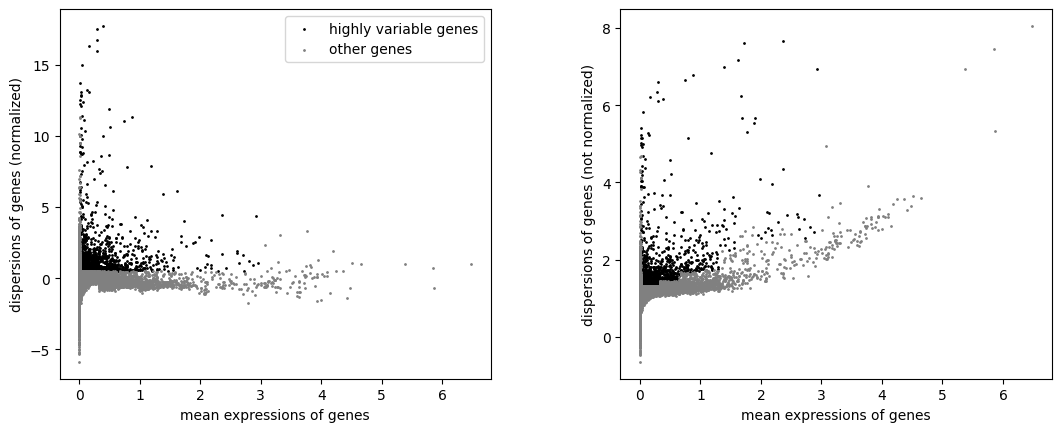

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
adata.raw = adata

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
sc.pp.scale(adata, max_value=10)

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

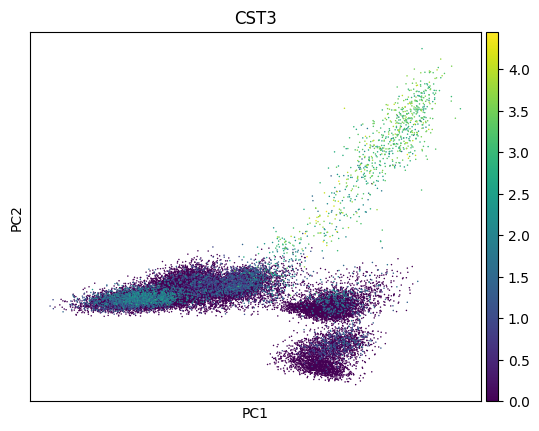

In [ ]:
sc.pl.pca(adata, color='CST3')

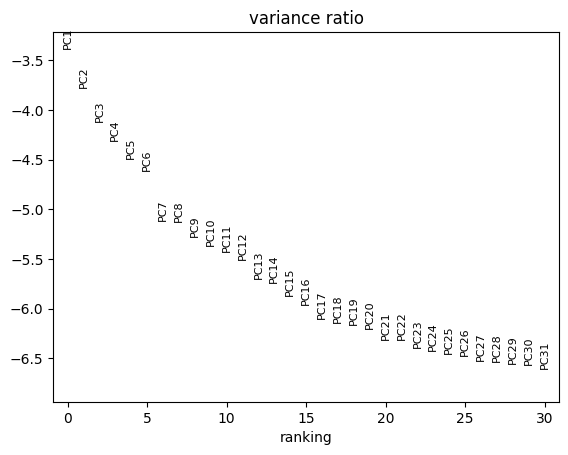

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
adata.write_h5ad("/Users/randyramdial/Desktop/FoMR/Caron_Concatenated 2020.h5ad")
adata

AnnData object with n_obs × n_vars = 25825 × 1762
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/pyth

In [ ]:
adata

AnnData object with n_obs × n_vars = 25825 × 1762
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

ValueError: You need to run `tl.leiden` or `tl.louvain` to compute community labels, or specify `groups='an_existing_key'`

In [ ]:
# Assuming 'adata' is loaded with your dataset
sc.tl.leiden(adata)

In [ ]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

In [ ]:
sc.tl.umap(adata)

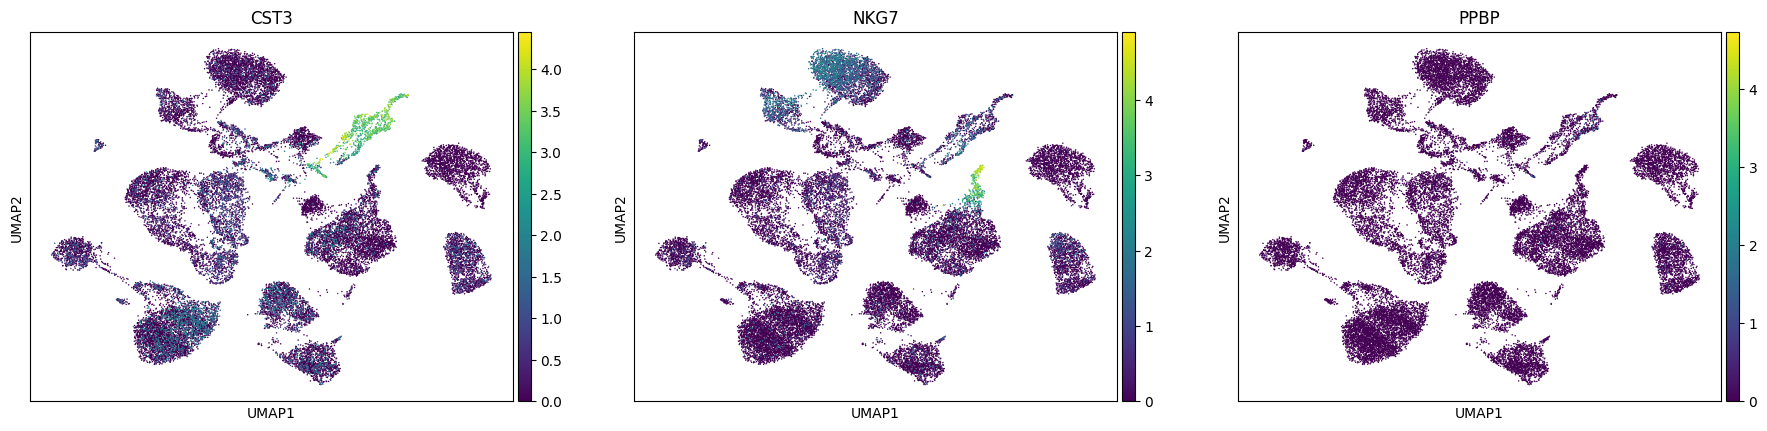

In [ ]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

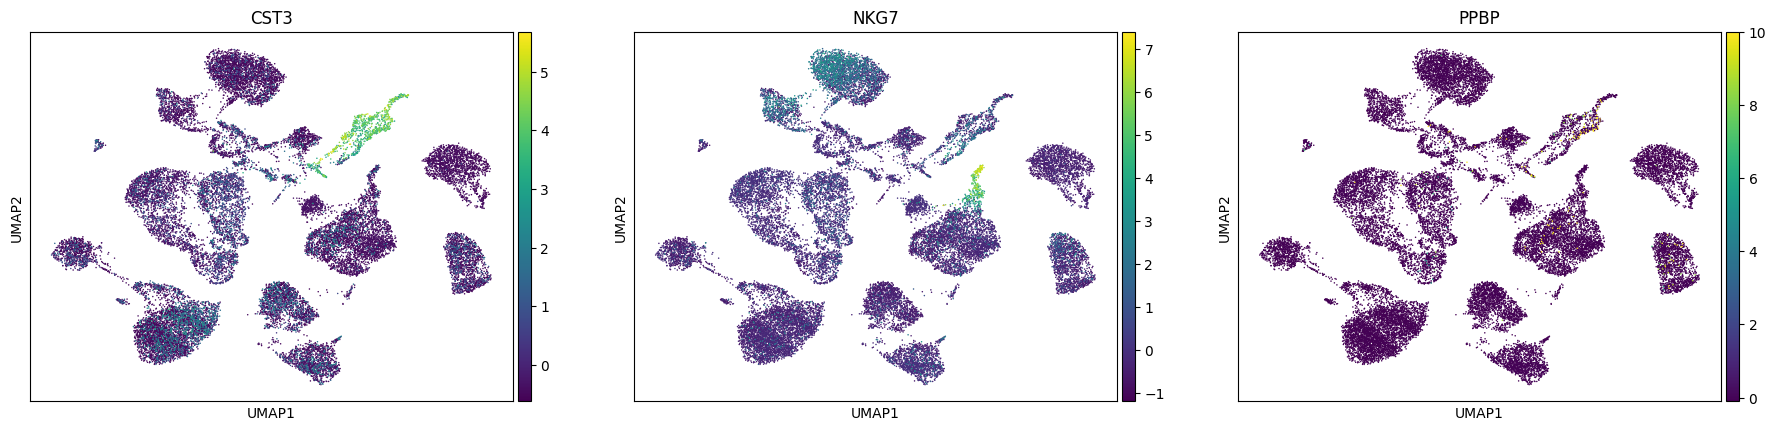

In [ ]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

In [ ]:
sc.tl.leiden(adata)

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


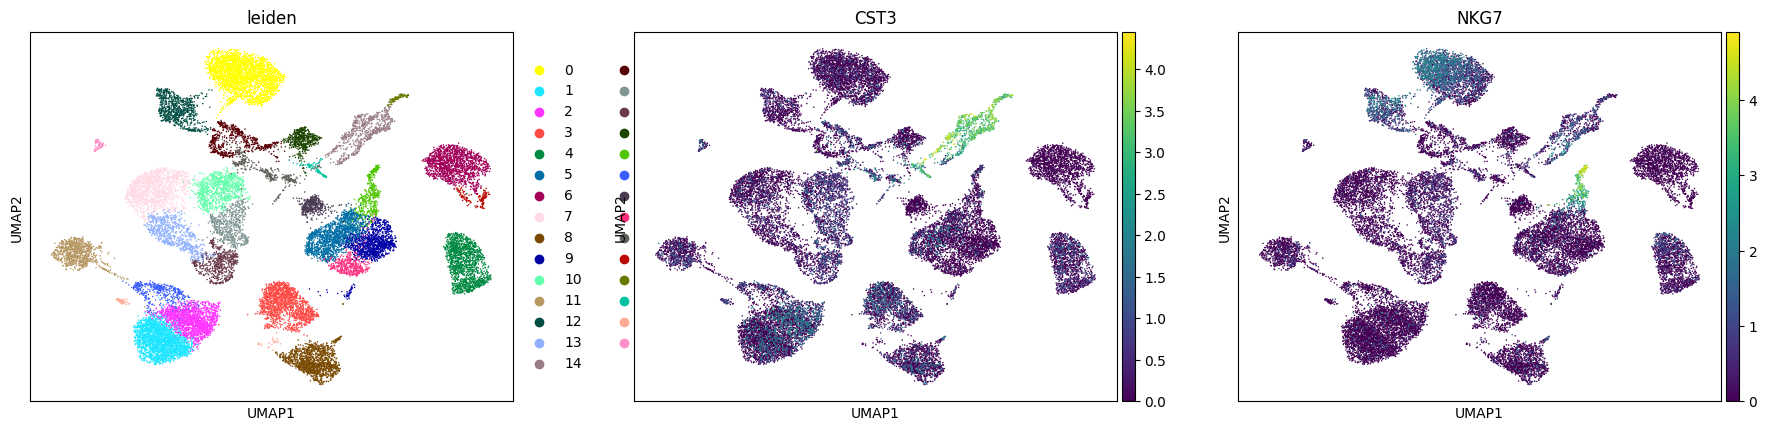

In [ ]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

In [ ]:
adata.write_h5ad("/Users/randyramdial/Desktop/FoMR/Caron_Concatenated 2020.h5ad")
adata

AnnData object with n_obs × n_vars = 25825 × 1762
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_g

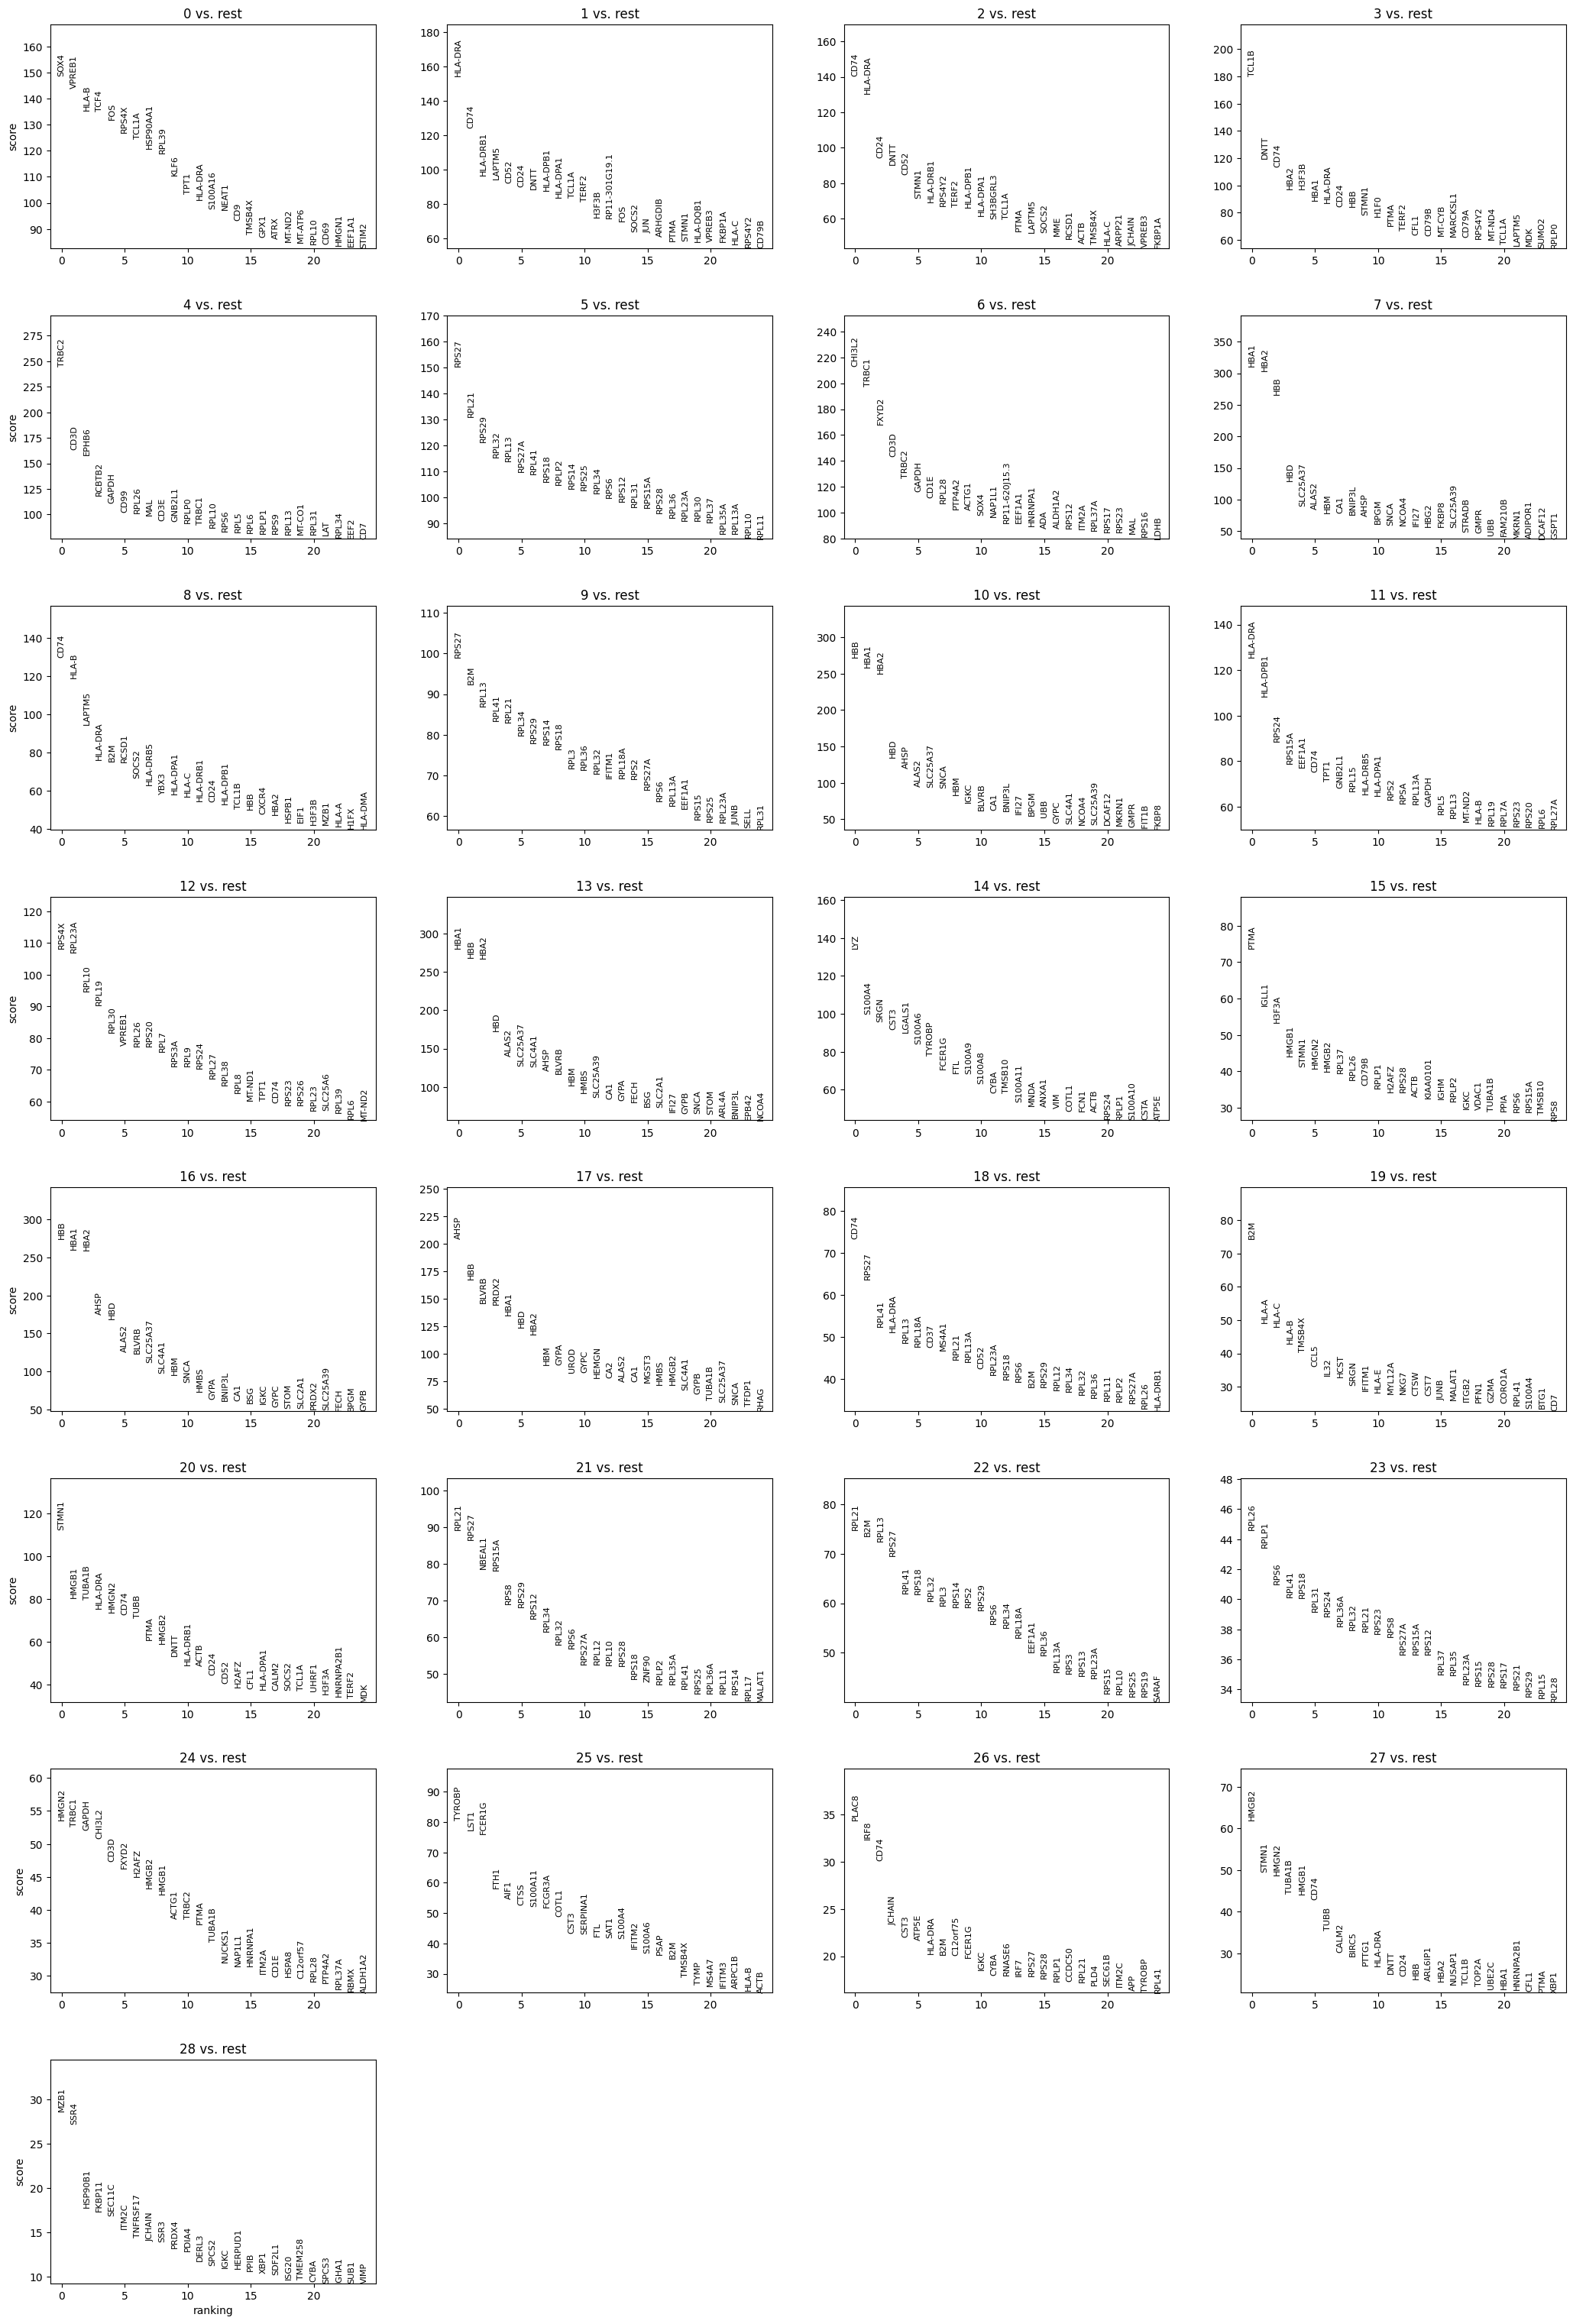

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes


/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_g

    finished (0:05:19)


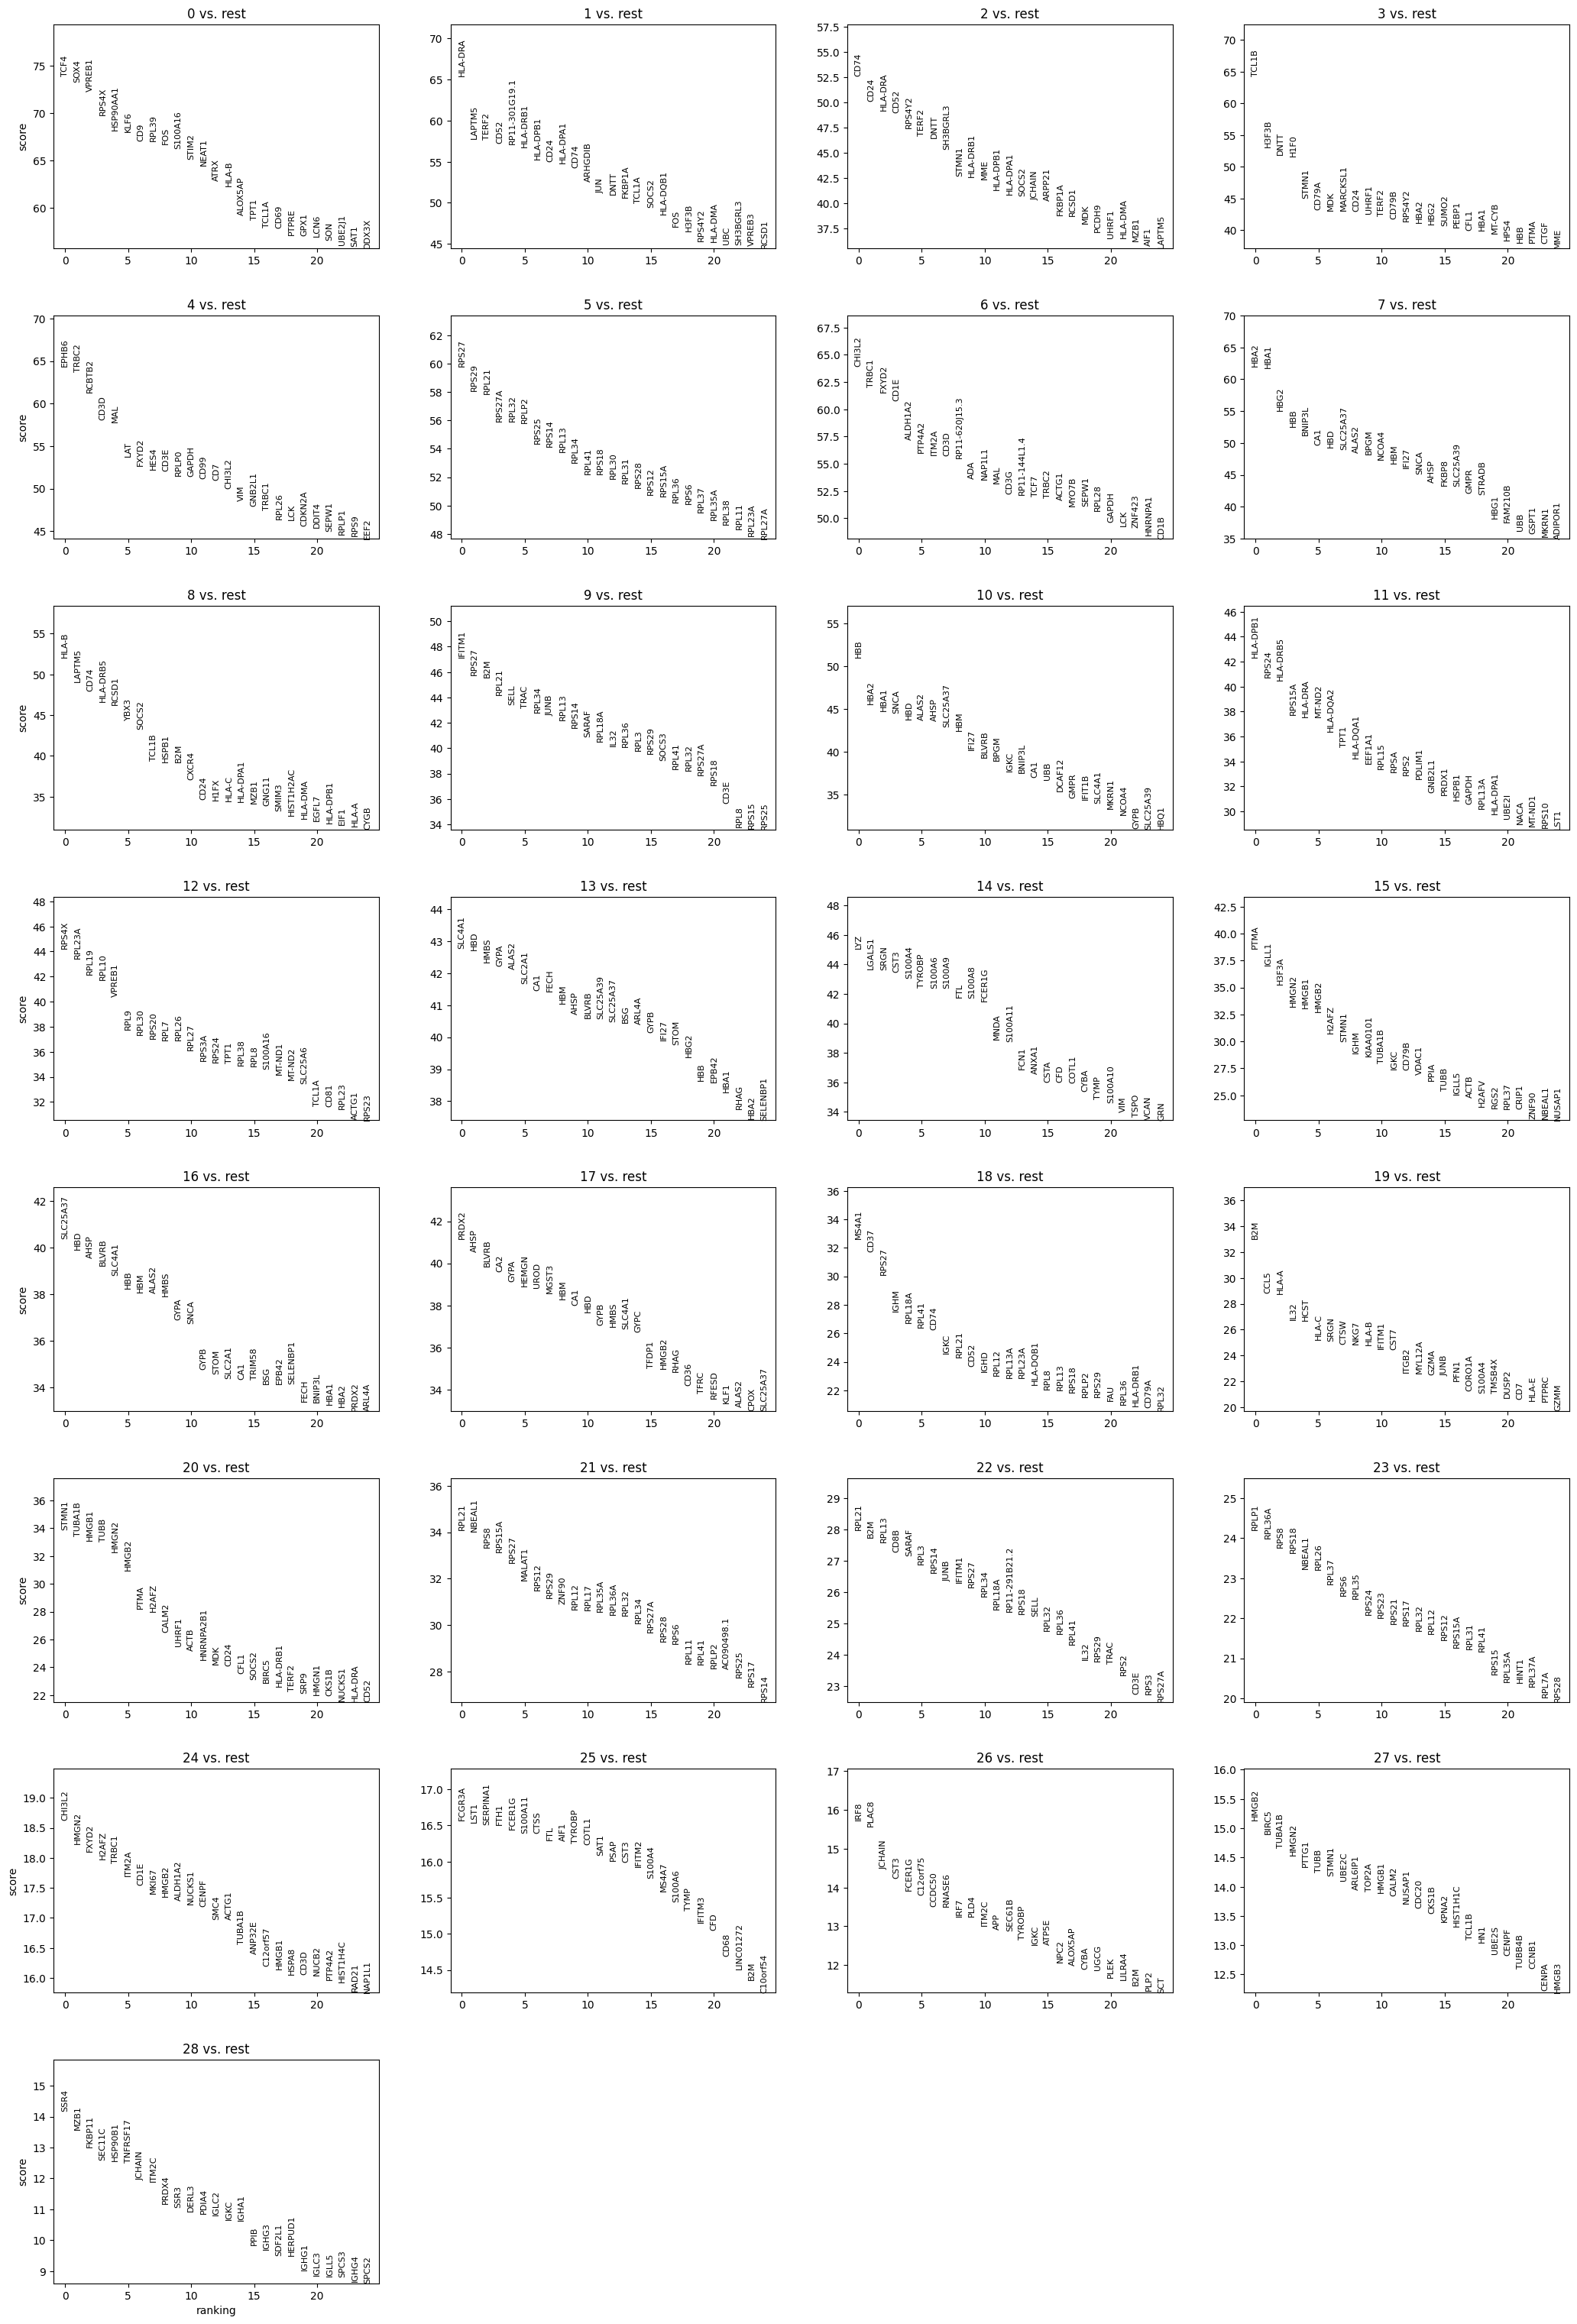

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
adata.write_h5ad("/Users/randyramdial/Desktop/FoMR/Caron_Concatenated 2020.h5ad")
adata

AnnData object with n_obs × n_vars = 25825 × 1762
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

ranking genes


/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    finished (0:08:33)


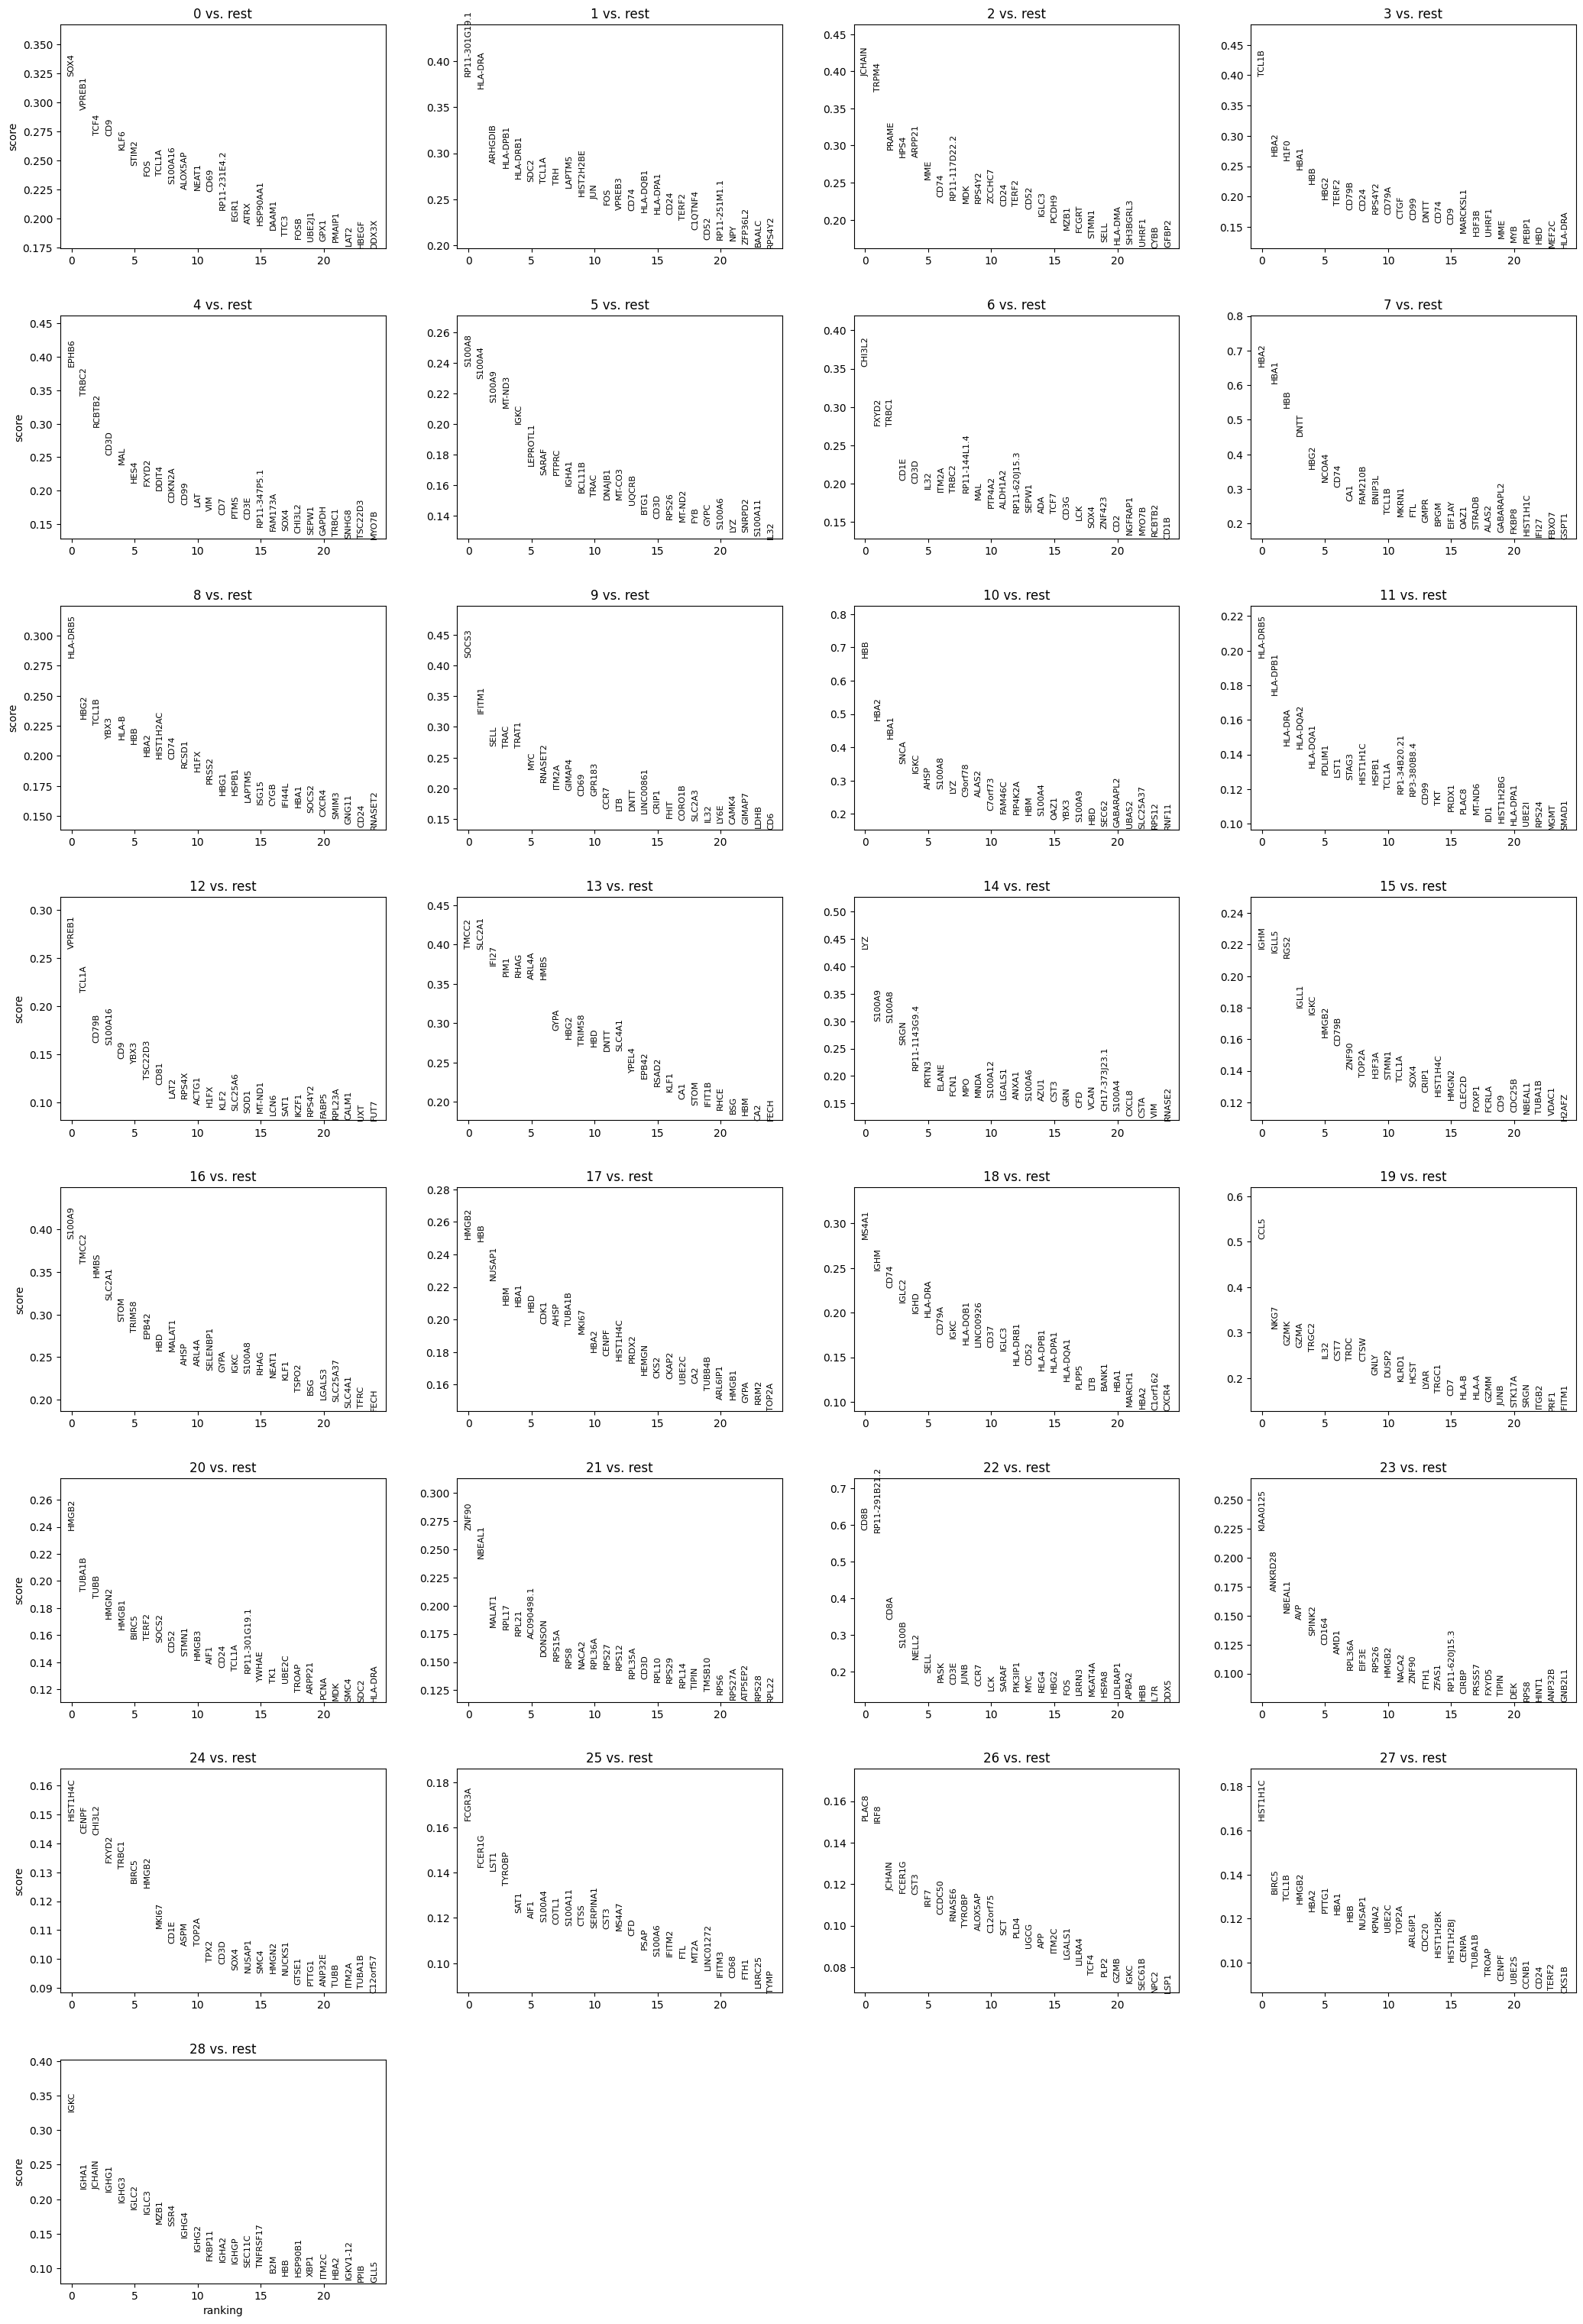

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [ ]:
adata.write_h5ad("/Users/randyramdial/Desktop/FoMR/Caron_Concatenated 2020.h5ad")
adata

AnnData object with n_obs × n_vars = 25825 × 1762
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [3]:
import scanpy as sc
import numpy as np
adata = sc.read("/Users/randyramdial/Desktop/FoMR/Caron_Concatenated 2020.h5ad")
adata

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 25825 × 1762
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
import pandas as pd
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0              1       2      3       4       5       6     7  \
0    SOX4  RP11-301G19.1  JCHAIN  TCL1B   EPHB6  S100A8  CHI3L2  HBA2   
1  VPREB1        HLA-DRA   TRPM4   HBA2   TRBC2  S100A4   FXYD2  HBA1   
2    TCF4        ARHGDIB   PRAME   H1F0  RCBTB2  S100A9   TRBC1   HBB   
3     CD9       HLA-DPB1    HPS4   HBA1    CD3D  MT-ND3    CD1E  DNTT   
4    KLF6       HLA-DRB1  ARPP21    HBB     MAL    IGKC    CD3D  HBG2   

          8       9  ...     19      20      21             22        23  \
0  HLA-DRB5   SOCS3  ...   CCL5   HMGB2   ZNF90           CD8B  KIAA0125   
1      HBG2  IFITM1  ...   NKG7  TUBA1B  NBEAL1  RP11-291B21.2   ANKRD28   
2     TCL1B    SELL  ...   GZMK    TUBB  MALAT1           CD8A    NBEAL1   
3      YBX3    TRAC  ...   GZMA   HMGN2   RPL17          S100B       AVP   
4     HLA-B   TRAT1  ...  TRGC2   HMGB1   RPL21          NELL2    SPINK2   

         24      25      26        27      28  
0  HIST1H4C  FCGR3A   PLAC8  HIST1H1C    IGKC  
1     CENPF  FCER1G    IRF8     BIRC5   IGHA1  
2    CHI3L2    LST1  JCHAIN     TCL1B  JCHAIN  
3     FXYD2  TYROBP  FCER1G     HMGB2   IGHG1  
4     TRBC1    SAT1    CST3      HBA2   IGHG3  

[5 rows x 29 columns]

In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

KeyError: 'pvals'

In [5]:
result = adata.uns['rank_genes_groups']
print(result.keys())

dict_keys(['names', 'params', 'scores'])


In [ ]:
import pandas as pd

result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names

# Access the p-values from the 'scores' key
pvals = result['scores']

# Create a DataFrame with gene names and corresponding p-values
pvals_df = pd.DataFrame({group + '_pval': pvals[group] for group in groups})

# Print the first 5 rows of the DataFrame
print(pvals_df.head(5))

     0_pval    1_pval    2_pval    3_pval    4_pval    5_pval    6_pval  \
0  0.322850  0.384032  0.393613  0.398735  0.385267  0.237575  0.352445   
1  0.293582  0.370423  0.373425  0.268196  0.342206  0.229946  0.276398   
2  0.271941  0.288784  0.294200  0.259971  0.295788  0.214232  0.275366   
3  0.271368  0.284321  0.284801  0.244665  0.253328  0.210954  0.204430   
4  0.259447  0.272380  0.284508  0.221234  0.239736  0.200238  0.200862   

     7_pval    8_pval    9_pval  ...   19_pval   20_pval   21_pval   22_pval  \
0  0.653193  0.281878  0.412725  ...  0.506003  0.237859  0.267112  0.586917   
1  0.606308  0.231139  0.322115  ...  0.309332  0.192323  0.241958  0.581207   
2  0.534270  0.225886  0.268564  ...  0.272207  0.187511  0.181160  0.341276   
3  0.454241  0.214613  0.266854  ...  0.267143  0.172305  0.179235  0.264636   
4  0.358265  0.214061  0.266699  ...  0.260161  0.164195  0.173874  0.233766   

    23_pval   24_pval   25_pval   26_pval   27_pval   28_pval  
0  0

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

ranking genes


KeyError: 'base'

In [3]:
import scanpy as sc
import pandas as pd

adata = sc.read("/Users/randyramdial/Desktop/FoMR/Caron_Concatenated 2020.h5ad")
adata

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 25825 × 1762
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/pyth

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


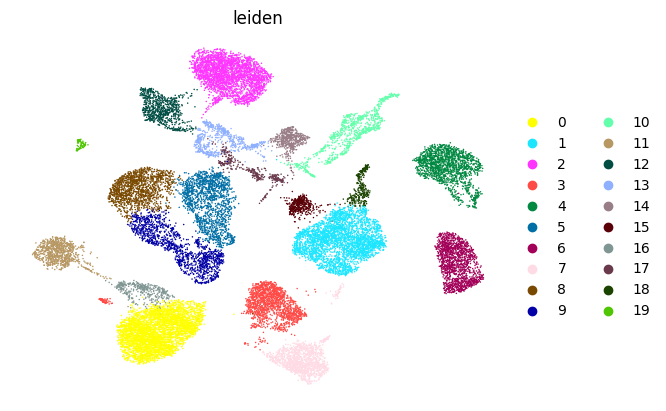

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


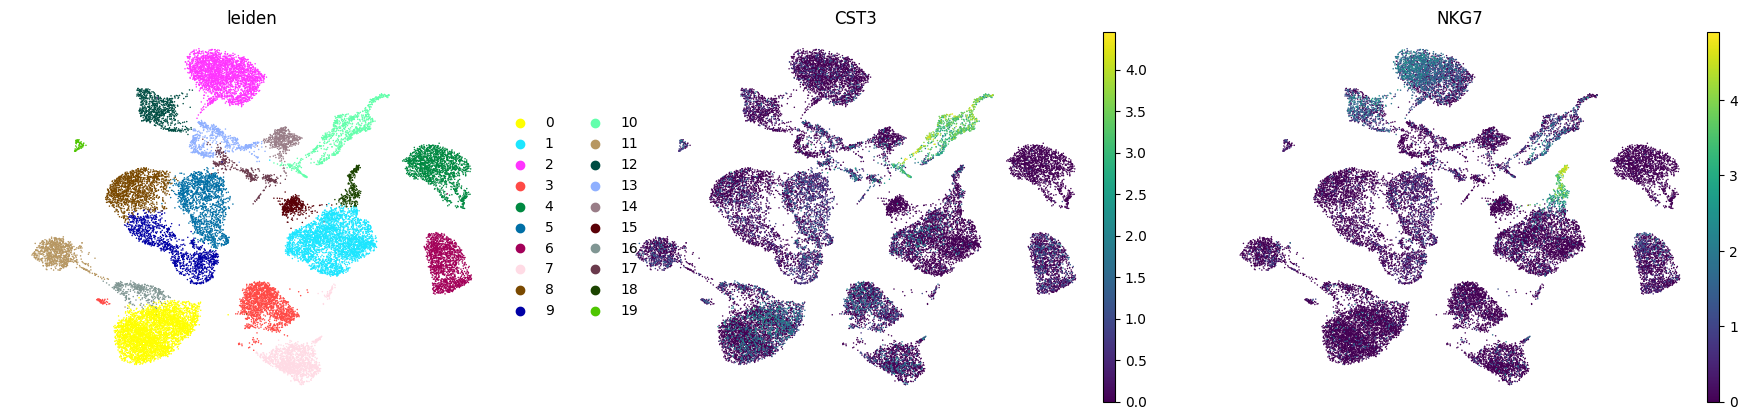

In [3]:
sc.pl.umap(adata, color = ['leiden'], frameon = False)
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'], frameon = False)

In [ ]:
adata.write_h5ad("/Users/randyramdial/Desktop/FoMR/Caron_Concatenated 2020_Integrated.h5ad")

In [4]:
sc.get.rank_genes_groups_df(adata, None)

KeyError: 'logfoldchanges'

In [4]:
# Perform clustering (for example, using Leiden clustering)
sc.tl.leiden(adata)

# Perform differential gene expression analysis
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')

# Access the results
result = adata.uns['rank_genes_groups']

# Print the keys available in the result dictionary
print(result.keys())

# Access specific data like names, scores, logfoldchanges, pvals, pvals_adj
names = result['names']
scores = result['scores']
logfoldchanges = result['logfoldchanges']
pvals = result['pvals']
pvals_adj = result['pvals_adj']

# Convert these arrays into dataframes
import pandas as pd
df_names = pd.DataFrame(names)
df_scores = pd.DataFrame(scores)
df_logfoldchanges = pd.DataFrame(logfoldchanges)
df_pvals = pd.DataFrame(pvals)
df_pvals_adj = pd.DataFrame(pvals_adj)

KeyError: 'base'

In [6]:
# Before running rank_genes_groups, log the data with a specific base value
sc.pp.log1p(adata, base=2)  # or any other base you prefer

# Now run rank_genes_groups
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


In [7]:
# Access the results
result = adata.uns['rank_genes_groups']

# Print available keys in the results dictionary
print(result.keys())

dict_keys(['params', 'names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges'])


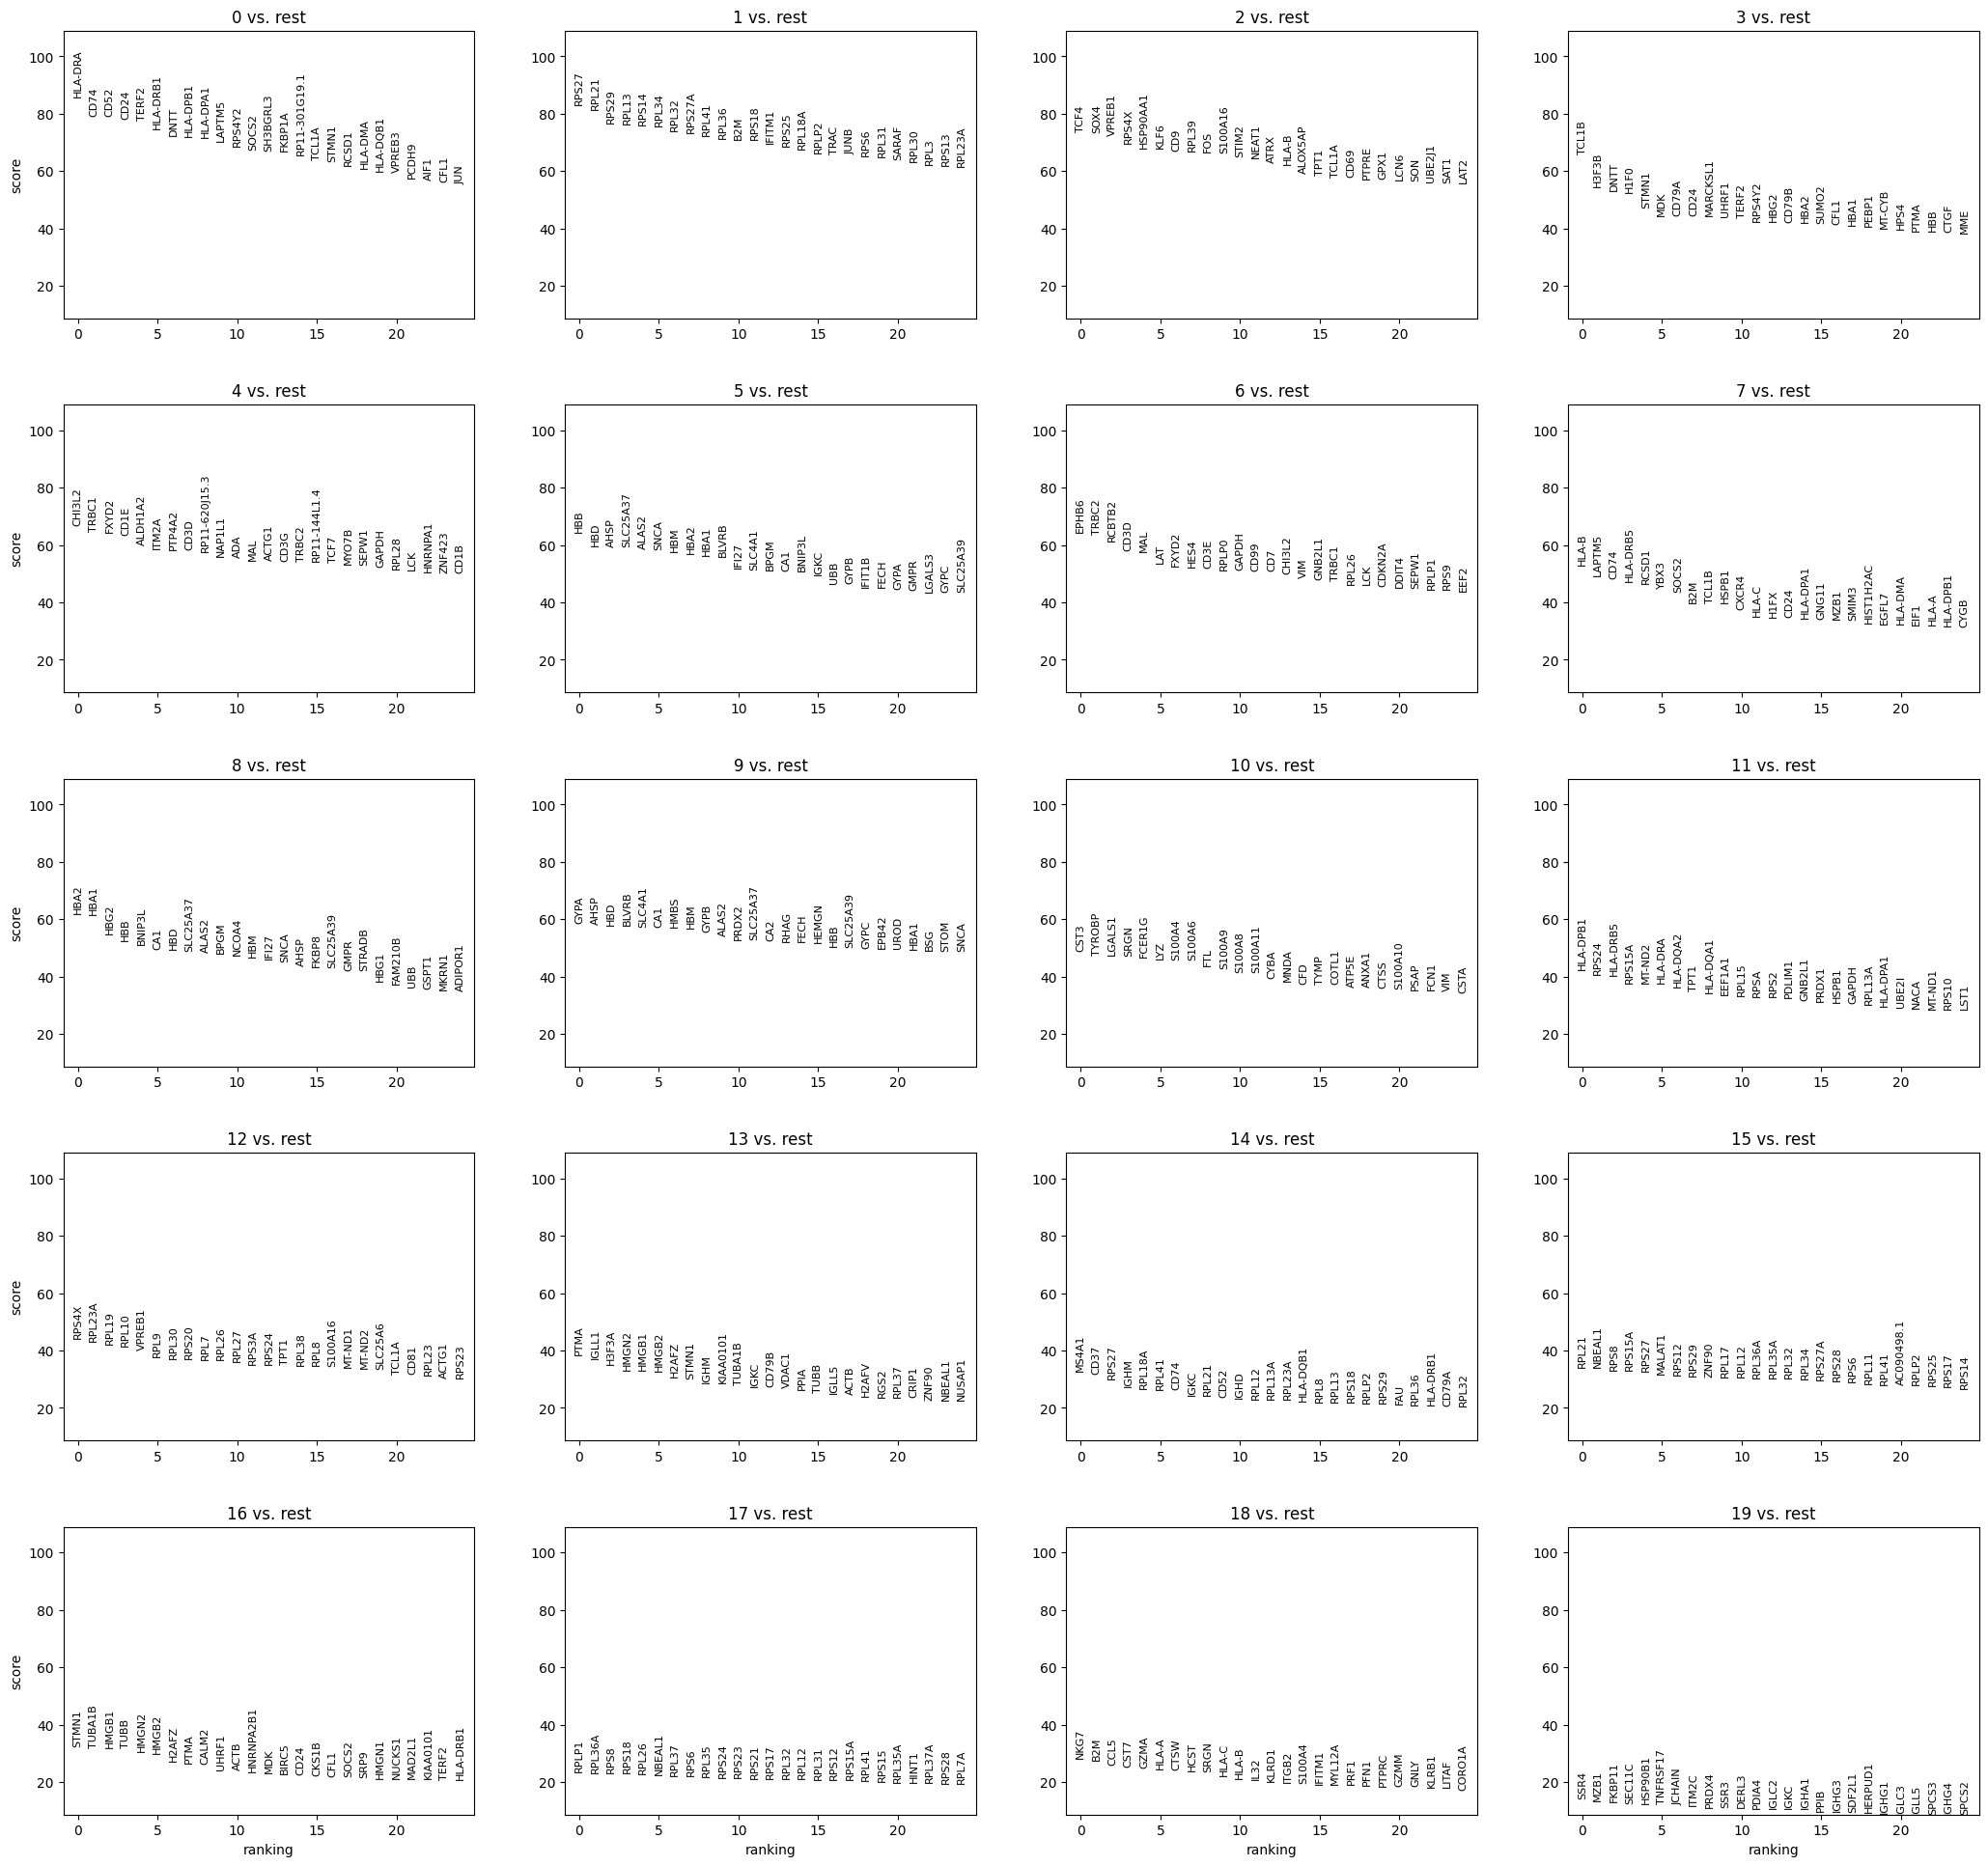

In [7]:
# Visualize the top differentially expressed genes for a specific group
sc.pl.rank_genes_groups(adata, n_genes=25, group='0')

In [1]:
import scanpy as sc
import pandas as pd

adata = sc.read("/Users/randyramdial/Desktop/FoMR/Caron_Concatenated 2020.h5ad")
adata

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 25825 × 1762
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5) ]
markers

group    names     scores  logfoldchanges     pvals  pvals_adj
0          0  HLA-DRA  85.829056        2.467039  0.000000   0.000000
1          0     CD74  79.229561        2.243870  0.000000   0.000000
2          0     CD52  79.145546        1.873199  0.000000   0.000000
3          0     CD24  78.207336        2.763118  0.000000   0.000000
4          0    TERF2  77.918350        2.998302  0.000000   0.000000
...      ...      ...        ...             ...       ...        ...
440969    19     CST3   3.251327        0.647054  0.001149   0.044045
440970    19     PPA1   3.237663        0.651687  0.001205   0.045906
440971    19    HDLBP   3.230659        1.164528  0.001235   0.046891
440972    19   MAN1A1   3.227896        1.621674  0.001247   0.047269
440973    19     AIM2   3.216866        4.321446  0.001296   0.048885

[28340 rows x 6 columns]

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


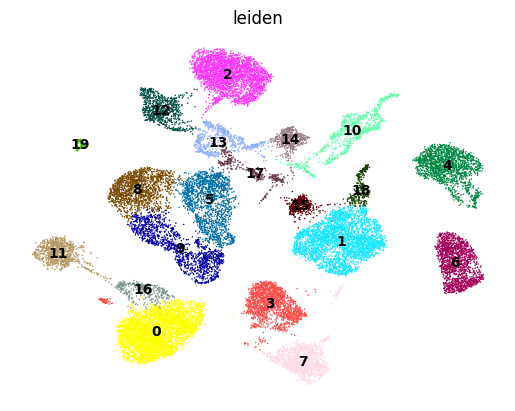

In [9]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = .5)
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = 'on data')
#sc.pl.umap(adata, color=['CST3'], frameon = False)

In [23]:
adata.write_h5ad("/Users/randyramdial/Desktop/FoMR/Caron_Concatenated 2020_Markers.h5ad")

In [75]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.01) & (markers['group'] == '19') & (markers.logfoldchanges > 3)] #& (markers.scores >30)]
markers

group         names     scores  logfoldchanges         pvals  \
440764    19        FKBP11  13.009746        4.853642  1.076994e-38   
440765    19        SEC11C  12.594215        5.001055  2.272072e-36   
440767    19      TNFRSF17  12.518314        7.612686  5.928106e-36   
440768    19        JCHAIN  11.951172        5.411286  6.401639e-33   
440769    19         ITM2C  11.887616        3.378884  1.372681e-32   
440770    19         PRDX4  11.181178        3.607289  5.041621e-29   
440772    19         DERL3  10.926162        5.016721  8.642711e-28   
440773    19         PDIA4  10.851913        3.171596  1.952933e-27   
440774    19         IGLC2  10.807303        5.079479  3.178774e-27   
440775    19          IGKC  10.658455        5.237062  1.592211e-26   
440776    19         IGHA1  10.637282        4.891870  1.998742e-26   
440778    19         IGHG3   9.693303        6.737288  3.219454e-22   
440779    19        SDF2L1   9.502178        3.184166  2.055445e-21   
440781    19         IGHG1   9.032141        6.608912  1.683459e-19   
440782    19         IGLC3   8.866690        4.586960  7.535276e-19   
440783    19         IGLL5   8.846504        4.990018  9.030328e-19   
440785    19         IGHG4   8.658618        7.418460  4.775183e-18   
440791    19         IGHG2   8.310163        7.645542  9.557015e-17   
440797    19         IGHA2   7.669018        6.816854  1.733183e-14   
440804    19         IGHGP   7.254995        9.346303  4.016754e-13   
440817    19    AL928768.3   6.595548        6.726738  4.236884e-11   
440824    19         IGLC7   6.318487        5.481060  2.641369e-10   
440828    19       IGLV3-1   6.036282        6.703465  1.577057e-09   
440839    19         IGLC6   5.651216        6.769643  1.593165e-08   
440844    19         PRDM1   5.515939        4.736095  3.469228e-08   
440853    19        SLAMF7   5.203920        5.508106  1.951282e-07   
440854    19      IGKV1-12   5.164163        6.515622  2.415178e-07   
440858    19      KIAA0125   5.110788        3.321319  3.208179e-07   
440866    19         ABCB9   4.945069        4.821427  7.611700e-07   
440868    19          ZBP1   4.907516        4.472787  9.223717e-07   
440872    19         FCRL5   4.780842        4.757577  1.745624e-06   
440874    19          ELL2   4.753286        3.852238  2.001369e-06   
440875    19         CPNE5   4.706532        4.303164  2.519657e-06   
440880    19         ODF3B   4.626138        3.775759  3.725476e-06   
440885    19       RASGRP3   4.470989        3.968299  7.785858e-06   
440897    19          CAV1   4.261862        5.523769  2.027309e-05   
440898    19  RP11-16E12.2   4.242075        5.313490  2.214628e-05   
440901    19     TNFRSF13B   4.211549        4.881564  2.536257e-05   
440907    19       PKHD1L1   4.111352        6.740296  3.933492e-05   
440918    19          MEI1   3.974605        3.339453  7.049621e-05   
440920    19        CLECL1   3.939341        3.158987  8.170583e-05   
440925    19          CHPF   3.845459        5.175277  1.203271e-04   

           pvals_adj  
440764  8.328038e-35  
440765  1.317688e-32  
440767  2.292003e-32  
440768  2.121503e-29  
440769  3.980433e-29  
440770  1.299506e-25  
440772  1.670780e-24  
440773  3.484933e-24  
440774  4.916079e-24  
440775  2.308507e-23  
440776  2.727460e-23  
440778  2.987396e-19  
440779  1.677176e-18  
440781  1.115796e-16  
440782  4.855648e-16  
440783  5.661771e-16  
440785  2.576155e-15  
440791  3.519105e-14  
440797  4.675159e-12  
440804  8.362624e-11  
440817  5.920918e-09  
440824  3.366730e-08  
440828  1.793361e-07  
440839  1.559419e-06  
440844  3.245127e-06  
440853  1.640067e-05  
440854  2.008147e-05  
440858  2.593148e-05  
440866  5.677692e-05  
440868  6.814388e-05  
440872  1.234603e-04  
440874  1.385903e-04  
440875  1.729320e-04  
440880  2.483437e-04  
440885  4.868365e-04  
440897  1.152684e-03  
440898  1.253047e-03  
440901  1.423958e-03  
440907  2.136982e-03  
440918  3.610091e-03  
440920  4.

In [40]:
markers[markers.names == 'HBB']

group names     scores  logfoldchanges  pvals  pvals_adj
115990     5   HBB  64.562233        5.429182    0.0        0.0

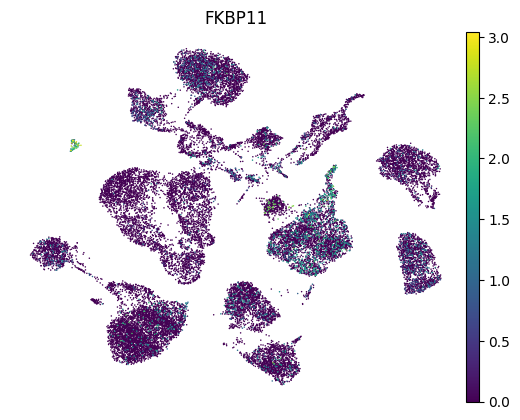

In [77]:
sc.tl.leiden(adata, resolution = .5)
sc.pl.umap(adata, color=['FKBP11'], frameon = False)
#sc.pl.umap(adata, color=['leiden'], frameon= False, legend_loc= 'on data')

In [12]:
for x in range(0,20):
    print(f'"{x}":"",')
"0":"PDCH9",
"1":"TRAC",
"2":"STIM2, HLA-DRB5",
"3":"NTRK1, TCL1B",
"4":"RP11-144L1.4",
"5":"IFIT1B",
"6":"EPHB6",
"7":"ARHGAP24, NFIA-AS2, TCL1B, HLA-DRB5, HLA-DQA2",
"8":"GSPT1",
"9":"UBAC1",
"10":"MNDA, FCN1, FCER1G",
"11":"HLA-DRB5, HLA-DQA2, RP3-380B8.4, SMAD1",
"12":"BLK, MTRNR2L8",
"13":"IGLL5, IRF4",
"14":"LINC00926",
"15":"NBEAL1",
"16":"",
"17":"AVP",
"18":"KLRD1",
"19":"TNFRSF17",

"0":"",
"1":"",
"2":"",
"3":"",
"4":"",
"5":"",
"6":"",
"7":"",
"8":"",
"9":"",
"10":"",
"11":"",
"12":"",
"13":"",
"14":"",
"15":"",
"16":"",
"17":"",
"18":"",
"19":"",


In [49]:
#for x in range(0,29):
    print(f'"{x}":"",')
"0":"STIM2, HBEGF, PDGFA",
"1":"RP11-301G19.1",
"2":"JCHAIN, PRAME, PCP4",
"3":"TCL1B",
"4":"EPHB6",
"5":"",
"6":"",
"7":"",
"8":"",
"9":"",
"10":"",
"11":"",
"12":"",
"13":"",
"14":"",
"15":"",
"16":"",
"17":"",
"18":"",
"19":"",
"20":"",
"21":"",
"22":"",
"23":"",
"24":"",
"25":"",
"26":"",
"27":"",
"28":"",

"0":"",
"1":"",
"2":"",
"3":"",
"4":"",
"5":"",
"6":"",
"7":"",
"8":"",
"9":"",
"10":"",
"11":"",
"12":"",
"13":"",
"14":"",
"15":"",
"16":"",
"17":"",
"18":"",
"19":"",
"20":"",
"21":"",
"22":"",
"23":"",
"24":"",
"25":"",
"26":"",
"27":"",
"28":"",


In [102]:
import pandas as pd

# Assuming you have a DataFrame containing marker genes for all groups
all_markers = sc.get.rank_genes_groups_df(adata, None)

# Create a dictionary to store the top 3 markers for each group
top_markers = {}

# Create a set to keep track of markers that have already been selected
selected_markers = set()

# Iterate through each group and find the top 3 markers based on the specified conditions
for group in range(29):
    # Filter marker genes for the current group and apply the conditions
    current_group_condition = (
        (all_markers['group'] == str(group)) &
        (all_markers.pvals_adj < 0.01))
    

    # Sort the marker genes for the current group by scores in descending order
    sorted_markers = all_markers[current_group_condition].sort_values(by='logfoldchanges', ascending=False)

    # Filter out markers that have already been selected in previous groups
    #sorted_markers = sorted_markers[~sorted_markers.index.isin(selected_markers)]

    # Take the top 3 markers for the current group
    top_group_markers = sorted_markers.head(3)

    # Add the selected markers to the set of selected markers
    selected_markers.update(top_group_markers.index)

    # Store the top markers for the current group in the dictionary
    top_markers[str(group)] = top_group_markers

# Now, top_markers is a dictionary where each key represents a group (0-28), and the corresponding value is a DataFrame containing the top 3 markers for that group based on the specified conditions and sorted by scores, with no overlap of markers between groups.

In [103]:
import pandas as pd

# Assuming you have already created the 'top_markers' dictionary as described earlier
# Create an empty list to store DataFrames for each group
top_markers_list = []

# Iterate through the 'top_markers' dictionary and append each group's top markers DataFrame to the list
for group, markers_df in top_markers.items():
    # Add a column to indicate the group for each marker
    markers_df['Group'] = group
    top_markers_list.append(markers_df)

# Concatenate all DataFrames in the list into one DataFrame
all_top_markers = pd.concat(top_markers_list)

# Reset the index of the concatenated DataFrame
all_top_markers.reset_index(drop=True, inplace=True)

# Now, 'all_top_markers' contains the top 3 markers for each group with a 'Group' column indicating the group for each marker.

/var/folders/gd/_c9x3wgj6ss3ny2r896nx1m80000gn/T/ipykernel_43669/3562272143.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  markers_df['Group'] = group


In [104]:
all_top_markers

group      names     scores  logfoldchanges          pvals      pvals_adj  \
0      0      F2RL3  22.590841        7.794907  5.332259e-113  2.931226e-111   
1      0  KRTAP12-3   3.612394        7.277658   3.033828e-04   1.544410e-03   
2      0      PDGFA  39.354004        6.701930   0.000000e+00   0.000000e+00   
3      1    ALDH1A1  12.759662        4.059549   2.753947e-37   1.432423e-35   
4      1        TRH  20.689108        4.023431   4.341700e-95   5.503757e-93   
..   ...        ...        ...             ...            ...            ...   
82    27     FAM64A  10.659196        5.660038   1.579569e-26   8.327920e-24   
83    27      PSRC1   6.050445        5.461523   1.444463e-09   1.264478e-07   
84    28      IGHGP   7.254995        9.346303   4.016754e-13   8.362624e-11   
85    28      IGHG2   8.310163        7.645542   9.557015e-17   3.519105e-14   
86    28   TNFRSF17  12.518314        7.612686   5.928106e-36   2.292003e-32   

   Group  
0      0  
1      0  
2      0  
3      1  
4      1  
..   ...  
82    27  
83    27  
84    28  
85    28  
86    28  

[87 rows x 7 columns]

In [105]:
# Filter the DataFrame for group '0'
group_0_markers = all_top_markers[all_top_markers['Group'] == '0']

# Display the results for group '0'
print(group_0_markers)


  group      names     scores  logfoldchanges          pvals      pvals_adj  \
0     0      F2RL3  22.590841        7.794907  5.332259e-113  2.931226e-111   
1     0  KRTAP12-3   3.612394        7.277658   3.033828e-04   1.544410e-03   
2     0      PDGFA  39.354004        6.701930   0.000000e+00   0.000000e+00   

  Group  
0     0  
1     0  
2     0  


In [106]:
# Assuming you have already created the 'all_top_markers' DataFrame as described earlier

# Get a list of unique group values
unique_groups = all_top_markers['Group'].unique()

# Iterate through the unique group values and display the results for each group
for group in unique_groups:
    group_markers = all_top_markers[all_top_markers['Group'] == group]
    print(f"Group {group} Top Markers:")
    print(group_markers)
    print("\n")


Group 0 Top Markers:
  group      names     scores  logfoldchanges          pvals      pvals_adj  \
0     0      F2RL3  22.590841        7.794907  5.332259e-113  2.931226e-111   
1     0  KRTAP12-3   3.612394        7.277658   3.033828e-04   1.544410e-03   
2     0      PDGFA  39.354004        6.701930   0.000000e+00   0.000000e+00   

  Group  
0     0  
1     0  
2     0  


Group 1 Top Markers:
  group    names     scores  logfoldchanges         pvals     pvals_adj Group
3     1  ALDH1A1  12.759662        4.059549  2.753947e-37  1.432423e-35     1
4     1      TRH  20.689108        4.023431  4.341700e-95  5.503757e-93     1
5     1     SPP1   8.955546        3.479292  3.380571e-19  1.001564e-17     1


Group 2 Top Markers:
  group    names     scores  logfoldchanges          pvals     pvals_adj Group
6     2    PRAME  21.246794        5.134806  3.529619e-100  6.766950e-98     2
7     2  CYP4F22   3.944971        4.352393   7.980957e-05  9.757791e-04     2
8     2     PCP4  11.551513

In [114]:
# Assuming you have already created the 'all_top_markers' DataFrame and added the 'custom_score' column as described earlier

# Get a list of unique group values
unique_groups = all_top_markers['Group'].unique()

# Initialize an empty list to store the top marker for each group
top_markers_per_group = []

# Iterate through the unique group values and find the top marker for each group
for group in unique_groups:
    group_markers = all_top_markers[all_top_markers['Group'] == group]
    
    # Sort the markers for the current group by 'custom_score' in descending order
    sorted_group_markers = group_markers.sort_values(by='custom_score', ascending=False)
    
    # Take the top marker for the current group (first row after sorting)
    top_marker = sorted_group_markers.iloc[0]
    
    top_markers_per_group.append(top_marker)

# Create a new DataFrame from the list of top markers
result_df = pd.DataFrame(top_markers_per_group)

# Reset the index of the resulting DataFrame
result_df.reset_index(drop=True, inplace=True)

# Display the top marker for each group
print(result_df)

   group          names     scores  logfoldchanges          pvals  \
0      0          PDGFA  39.354004        6.701930   0.000000e+00   
1      1            TRH  20.689108        4.023431   4.341700e-95   
2      2          PRAME  21.246794        5.134806  3.529619e-100   
3      3  CTD-2314B22.1   5.300392        6.557866   1.155541e-07   
4      4          GFRA4  15.158323        8.772963   6.675129e-52   
5      5           CD8B  16.050610        3.237834   5.660596e-58   
6      6   RP11-144L1.4  52.182175        8.237633   0.000000e+00   
7      7           HBA2  61.957588        5.563980   0.000000e+00   
8      8      LINC01416   8.446448        6.215827   3.002991e-17   
9      9          SOCS3  38.995354        4.615297   0.000000e+00   
10    10            HBB  51.005714        5.352121   0.000000e+00   
11    11   IGKV1OR2-108  16.574203        8.364995   1.070739e-61   
12    12           FUT7  21.902334        3.512512  2.468060e-106   
13    13          TMCC2  34.502163

In [160]:
import pandas as pd

# Assuming you have a DataFrame containing marker genes for all groups
all_markers = sc.get.rank_genes_groups_df(adata, None)

# Create a dictionary to store the top 3 markers for each group
top_markers = {}

# Create a set to keep track of markers that have already been selected
selected_markers = set()

# Iterate through each group and find the top 3 markers based on the specified conditions
for group in range(29):
    # Filter marker genes for the current group and apply the conditions
    current_group_condition = (
        (all_markers['group'] == str(group)) &
        (all_markers.pvals_adj < 0.01))
    
    # Filter markers with positive logfoldchanges and scores
    filtered_markers = all_markers[current_group_condition]
    filtered_markers = filtered_markers[(filtered_markers['logfoldchanges'] > 0) & (filtered_markers['scores'] > 0)]

    # Calculate the custom score as the product of logfoldchanges and scores for the filtered markers
    filtered_markers['custom_score'] = filtered_markers['logfoldchanges'] * filtered_markers['scores']

    # Sort the filtered markers by the custom score in descending order
    sorted_markers = filtered_markers.sort_values(by='custom_score', ascending=False)

    # Filter out markers that have already been selected in previous groups
    sorted_markers = sorted_markers[~sorted_markers.index.isin(selected_markers)]

    # Take the top 3 markers for the current group
    top_group_markers = sorted_markers.head(3)

    # Add the selected markers to the set of selected markers
    selected_markers.update(top_group_markers.index)

    # Store the top markers for the current group in the dictionary
    top_markers[str(group)] = top_group_markers

# Now, top_markers is a dictionary where each key represents a group (0-28), and the corresponding value is a DataFrame containing the top 3 markers for that group based on the specified conditions (positive logfoldchanges and scores) and sorted by the custom score, with no overlap of markers between groups.
top_markers

{'0':     group  names     scores  logfoldchanges  pvals  pvals_adj  custom_score
 38      0  HBEGF  51.998108        5.389827    0.0        0.0    280.260803
 10      0  STIM2  65.126686        4.071157    0.0        0.0    265.140930
 116     0  PDGFA  39.354004        6.701930    0.0        0.0    263.747772,
 '1':       group          names     scores  logfoldchanges  pvals  pvals_adj  \
 23202     1  RP11-301G19.1  57.163185        3.439236    0.0        0.0   
 23200     1          TERF2  57.687187        2.704097    0.0        0.0   
 23198     1        HLA-DRA  65.439972        2.330846    0.0        0.0   
 
        custom_score  
 23202    196.597687  
 23200    155.991745  
 23198    152.530502  ,
 '2':       group   names     scores  logfoldchanges  pvals  pvals_adj  custom_score
 46397     2    CD24  50.107010        2.509490    0.0        0.0    125.743027
 46410     2  JCHAIN  40.298737        3.056284    0.0        0.0    123.164383
 46400     2  RPS4Y2  47.453339      

In [163]:
import pandas as pd

# Assuming you have a DataFrame containing marker genes for all groups
all_markers = sc.get.rank_genes_groups_df(adata, None)

# Create a dictionary to store the top 3 markers for each group
top_markers_unique = {}

# Create a set to keep track of selected custom_scores
selected_custom_scores = set()

# Iterate through each group and find the top 3 markers based on the specified conditions
for group in range(29):
    # Filter marker genes for the current group and apply the conditions
    current_group_condition = (
        (all_markers['group'] == str(group)) &
        (all_markers.pvals_adj < 0.01))
    
    # Filter markers with positive logfoldchanges and scores
    filtered_markers = all_markers[current_group_condition]
    filtered_markers = filtered_markers[(filtered_markers['logfoldchanges'] > 0) & (filtered_markers['scores'] > 0)]

    # Calculate the custom score as the product of logfoldchanges and scores for the filtered markers
    filtered_markers['custom_score'] = filtered_markers['logfoldchanges'] * filtered_markers['scores']

    # Exclude markers with custom_scores that have already been selected
    filtered_markers = filtered_markers[~filtered_markers['custom_score'].isin(selected_custom_scores)]

    # Sort the filtered markers by the custom score in descending order
    sorted_markers = filtered_markers.sort_values(by='custom_score', ascending=False)

    # Take the top 3 markers for the current group
    top_group_markers = sorted_markers.head(3)

    # Add the selected custom_scores to the set of selected custom_scores
    selected_custom_scores.update(top_group_markers['custom_score'])

    # Store the top markers for the current group in the dictionary
    top_markers_unique[str(group)] = top_group_markers

# Now, top_markers_unique is a dictionary where each key represents a group (0-28), and the corresponding value is a DataFrame containing the top 3 markers for that group based on the specified conditions (positive logfoldchanges and scores), sorted by the custom score, with no overlap of custom_scores between groups.
top_markers_unique


{'0':     group  names     scores  logfoldchanges  pvals  pvals_adj  custom_score
 38      0  HBEGF  51.998108        5.389827    0.0        0.0    280.260803
 10      0  STIM2  65.126686        4.071157    0.0        0.0    265.140930
 116     0  PDGFA  39.354004        6.701930    0.0        0.0    263.747772,
 '1':       group          names     scores  logfoldchanges  pvals  pvals_adj  \
 23202     1  RP11-301G19.1  57.163185        3.439236    0.0        0.0   
 23200     1          TERF2  57.687187        2.704097    0.0        0.0   
 23198     1        HLA-DRA  65.439972        2.330846    0.0        0.0   
 
        custom_score  
 23202    196.597687  
 23200    155.991745  
 23198    152.530502  ,
 '2':       group   names     scores  logfoldchanges  pvals  pvals_adj  custom_score
 46397     2    CD24  50.107010        2.509490    0.0        0.0    125.743027
 46410     2  JCHAIN  40.298737        3.056284    0.0        0.0    123.164383
 46400     2  RPS4Y2  47.453339      

KeyError: "None of [Index([23198, 23199, 23200, 23201, 23202, 23203, 23204, 23205, 23206, 23207,\n       ...\n       24502, 24503, 24504, 24505, 24506, 24507, 24508, 24509, 24510, 24511],\n      dtype='int64', length=1314)] are in the [index]"

In [168]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame containing marker genes for all groups
all_markers = sc.get.rank_genes_groups_df(adata, None)

# Create a dictionary to store the top 3 markers for each group
top_markers = {}

# Iterate through each group and find the top 3 markers based on the specified conditions
for group in range(29):
    # Filter marker genes for the current group and apply the conditions
    current_group_condition = (
        (all_markers['group'] == str(group)) &
        (all_markers.pvals_adj < 0.01))
    
    # Filter markers with positive logfoldchanges and scores
    filtered_markers = all_markers[current_group_condition]
    filtered_markers = filtered_markers[(filtered_markers['logfoldchanges'] > 0) & (filtered_markers['scores'] > 0)]

    # Calculate the custom score as the product of logfoldchanges and scores for the filtered markers
    filtered_markers['custom_score'] = filtered_markers['logfoldchanges'] * filtered_markers['scores']

    # Calculate the mean custom_score for the current group's filtered markers
    current_group_mean = filtered_markers['custom_score'].mean()

    # Calculate the standard deviation of custom_scores for the current group's filtered markers
    current_group_std = filtered_markers['custom_score'].std()

    # Iterate through other groups and compare the current group's custom_score to others
    significantly_different_markers = []
    for other_group in range(29):
        if other_group != group:
            # Filter markers for the other group and apply the conditions
            other_group_condition = (
                (all_markers['group'] == str(other_group)) &
                (all_markers.pvals_adj < 0.01))
            
            # Filter markers with positive logfoldchanges and scores for the other group
            other_group_markers = all_markers[other_group_condition]
            other_group_markers = other_group_markers[(other_group_markers['logfoldchanges'] > 0) & (other_group_markers['scores'] > 0)]

            # Calculate the custom score as the product of logfoldchanges and scores for the other group's markers
            other_group_markers['custom_score'] = other_group_markers['logfoldchanges'] * other_group_markers['scores']

            # Calculate the mean custom_score for the other group's markers
            other_group_mean = other_group_markers['custom_score'].mean()
            
            # Calculate the standard deviation of custom_scores for the other group's markers
            other_group_std = other_group_markers['custom_score'].std()
            
            # Calculate the Z-score for the current group's custom_score compared to the other group
            z_score = (current_group_mean - other_group_mean) / np.sqrt(current_group_std**2 + other_group_std**2)
            
            # Check if the Z-score is significantly different (you can define a threshold)
            if abs(z_score) >= 1.0:
                significantly_different_markers.append(filtered_markers.index.tolist())

    # Select the top 3 markers that are either unique to the group or significantly different in custom_score
    top_group_markers = filtered_markers.loc[filtered_markers.index.isin(significantly_different_markers)]
    top_group_markers = top_group_markers.head(3)

    # Store the top markers for the current group in the dictionary
    top_markers[str(group)] = top_group_markers

# Now, top_markers is a dictionary where each key represents a group (0-28), and the corresponding value is a DataFrame containing the top 3 markers for that group based on the specified conditions:
# 1) Markers that are unique to the group.
# 2) Markers whose custom_score is significantly different in one group compared to others.
top_markers

{'0': Empty DataFrame
 Columns: [group, names, scores, logfoldchanges, pvals, pvals_adj, custom_score]
 Index: [],
 '1': Empty DataFrame
 Columns: [group, names, scores, logfoldchanges, pvals, pvals_adj, custom_score]
 Index: [],
 '2': Empty DataFrame
 Columns: [group, names, scores, logfoldchanges, pvals, pvals_adj, custom_score]
 Index: [],
 '3': Empty DataFrame
 Columns: [group, names, scores, logfoldchanges, pvals, pvals_adj, custom_score]
 Index: [],
 '4': Empty DataFrame
 Columns: [group, names, scores, logfoldchanges, pvals, pvals_adj, custom_score]
 Index: [],
 '5': Empty DataFrame
 Columns: [group, names, scores, logfoldchanges, pvals, pvals_adj, custom_score]
 Index: [],
 '6': Empty DataFrame
 Columns: [group, names, scores, logfoldchanges, pvals, pvals_adj, custom_score]
 Index: [],
 '7': Empty DataFrame
 Columns: [group, names, scores, logfoldchanges, pvals, pvals_adj, custom_score]
 Index: [],
 '8': Empty DataFrame
 Columns: [group, names, scores, logfoldchanges, pvals, pv